In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
image = cv2.imread("./photos/photo_00155.jpg")

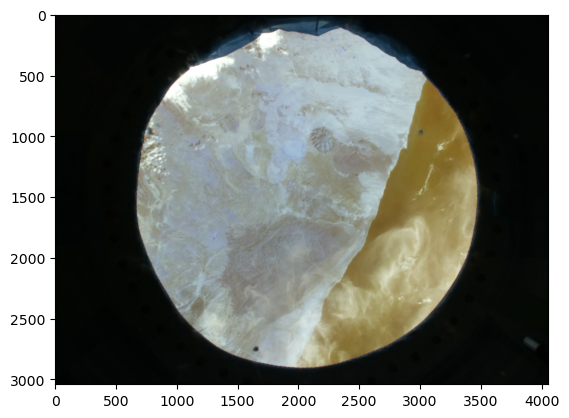

In [4]:
plt.imshow(image)

In [12]:
def detect_night(im):
    in_min = np.percentile(im, 10) # Adjust percentile for better detection
    in_max = np.percentile(im, 90)

    if in_min == in_max:
        return True

    return False

In [6]:
def generate_mask(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 40
    lower_white = np.array([0,0,255-sensitivity])
    upper_white = np.array([255,sensitivity,255])

    cloud_mask = cv2.inRange(hsv, lower_white, upper_white)

    sensitivity2 = 40
    lower_black = np.array([0,0,0])
    upper_black = np.array([255,255,sensitivity2])

    black_mask = cv2.inRange(hsv, lower_black, upper_black)

    return np.logical_not(np.logical_or(cloud_mask, black_mask))


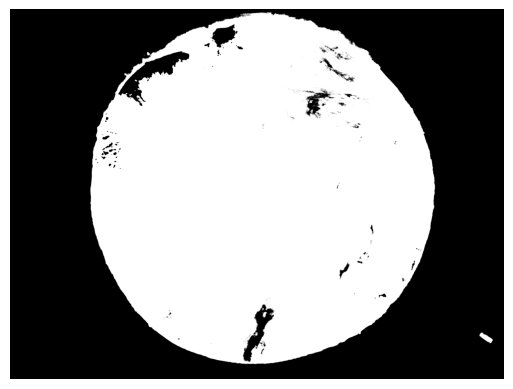

In [7]:
plt.axis('off')
plt.imshow(generate_mask(image), cmap="gray")

In [14]:
from tqdm import tqdm
import os, os.path

imgs = []
path = "./photos/"

for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() != ".jpg":
        continue
    imgs.append(os.path.join(path,f))

imgs.sort()

for image_path in tqdm(imgs):
    image = cv2.imread(image_path)

    if not detect_night(image):
        mask = generate_mask(image)

        cv2.imwrite(image_path.replace("photos", "masks"), mask * 255)

100%|██████████| 55/55 [00:16<00:00,  3.32it/s]
